### Comparecimento e abstenção do estado de SP - 2020

**Arquivo extraído do repositório de dados públicos do TSE: https://bityli.com/X3ZhU**<br> 
**Página inicial > Comparecimento e Abstenção > 2018**<br>
<br>


Atenção!
Siga as intruções de configuração de ambiente do leia-me para que os códigos sejam executados corretamente
Execute novamente as células após realizar qualquer alteração


## Importação das bibliotecas utilizadas:

In [1]:
import pandas as pd
import matplotlib.pyplot as mtpy
import numpy as np
mtpy.style.use('classic')
%matplotlib inline

## Leitura do arquivo CSV
Atente para alterar o local onde o arquivo está salvo. Para arquivos salvos no seu usuário, o caminho correto é "C:/Users/**seu_user**/perfil_eleitor_secao_ATUAL_SP.csv"<br>
O arquivo será lido e as informações armazenadas em uma variável chamada df

In [2]:

dados = pd.read_csv('C:/Users/Rafael/perfil_comparecimento_abstencao_2018.csv' , sep = ";" , encoding = "Latin 1")

## Amostra dos dados:
(Para uma descrição sobre o conteúdo de cada coluna consulte o LEIAME.pdf do "perfil_eleitor_secao_ATUAL_SP.csv".)

In [3]:
dados.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,...,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCAO,QT_COMPARECIMENTO_DEFICIENCIA,QT_ABSTENCAO_DEFICIENCIA,QT_COMPARECIMENTO_TTE,QT_ABSTENCAO_TTE
0,29/01/2019,17:33:34,2018,2,MA,7820,LAGOA DO MATO,44,4,FEMININO,...,20 anos,5,ENSINO MÉDIO INCOMPLETO,5,5,0,0,0,0,0
1,29/01/2019,17:33:34,2018,2,MA,7820,LAGOA DO MATO,44,4,FEMININO,...,30 a 34 anos,1,ANALFABETO,1,1,0,0,0,0,0
2,29/01/2019,17:33:34,2018,2,MA,7820,LAGOA DO MATO,44,4,FEMININO,...,30 a 34 anos,2,LÊ E ESCREVE,5,4,1,0,0,0,0
3,29/01/2019,17:33:34,2018,2,MA,7820,LAGOA DO MATO,44,4,FEMININO,...,35 a 39 anos,2,LÊ E ESCREVE,22,20,2,0,0,0,0
4,29/01/2019,17:33:34,2018,2,MA,7820,LAGOA DO MATO,44,4,FEMININO,...,35 a 39 anos,4,ENSINO FUNDAMENTAL COMPLETO,6,6,0,0,0,0,0


**Nomes das colunas:**

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8362586 entries, 0 to 8362585
Data columns (total 23 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   DT_GERACAO                     object
 1   HH_GERACAO                     object
 2   ANO_ELEICAO                    int64 
 3   NR_TURNO                       int64 
 4   SG_UF                          object
 5   CD_MUNICIPIO                   int64 
 6   NM_MUNICIPIO                   object
 7   NR_ZONA                        int64 
 8   CD_GENERO                      int64 
 9   DS_GENERO                      object
 10  CD_ESTADO_CIVIL                int64 
 11  DS_ESTADO_CIVIL                object
 12  CD_FAIXA_ETARIA                int64 
 13  DS_FAIXA_ETARIA                object
 14  CD_GRAU_ESCOLARIDADE           int64 
 15  DS_GRAU_ESCOLARIDADE           object
 16  QT_APTOS                       int64 
 17  QT_COMPARECIMENTO              int64 
 18  QT_ABSTENCAO          

**Seleção de colunas que serão utilizadas:**


In [5]:
Por_turno = ['DS_FAIXA_ETARIA','QT_ABSTENCAO', 'NM_MUNICIPIO', 'SG_UF','NR_TURNO','QT_COMPARECIMENTO']

In [6]:
dadosTurno = dados.filter(items=Por_turno)

## Comparecimento e abstenção


**Lista das cidades que tiveram segundo turno:**

Possível verificar a lista alterando 'QT_ABSTENCAO'(eleitores que se abstiveram) para 'QT_COMPARECIMENTO'(eleitores que compareceram)

In [7]:
varturno = 2
varanalise = 'QT_ABSTENCAO'

turno1 = dadosTurno.query("NR_TURNO == @varturno ")
turno2 = turno1.query("SG_UF =='SP'")
turno2.groupby('NM_MUNICIPIO')[varanalise].sum().sort_values()

NM_MUNICIPIO
PRACINHA                     206
GUARANI D'OESTE              212
NOVA CASTILHO                225
PEDRANÓPOLIS                 260
SÃO JOÃO DE IRACEMA          277
                          ...   
OSASCO                    120245
SANTO ANDRÉ               122687
SÃO BERNARDO DO CAMPO     125234
CAMPINAS                  190115
SÃO PAULO                1923944
Name: QT_ABSTENCAO, Length: 645, dtype: int64


## Visualização em gráfico:

Alterações possíveis:
- Turno: varturno = 1 ou varturno = 2
- Cidade: varmun1 = 'Digite_a_cidade'
- Comparecimento: varanalise = 'QT_COMPARECIMENTO'
- Abstenção: varanalise = 'QT_ABSTENCAO'


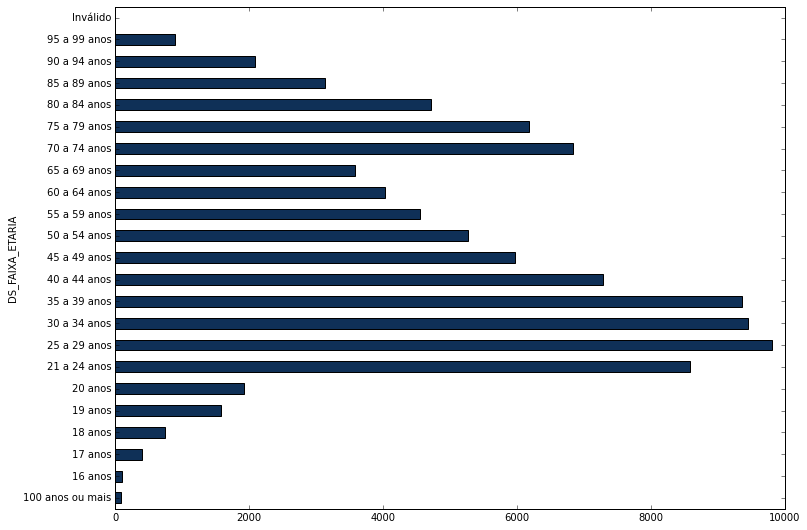

In [8]:

varturno = 1
varmun1 = 'São josé dos Campos'.upper()
varanalise = 'QT_ABSTENCAO' #


turno = dadosTurno.query("NR_TURNO == @varturno")#
turnoCidade = turno.query("NM_MUNICIPIO ==@varmun1")#
turnoCidade.groupby('DS_FAIXA_ETARIA')[varanalise].sum().sort_index().plot(kind='barh', figsize=(12,9),color = '#0f3057')#
Grupos = turnoCidade.groupby('DS_FAIXA_ETARIA')[varanalise].sum().sort_index()

**Agrupamento das faixas etárias por jovens até 29 anos, adultos e idosos**

In [9]:
jovens = Grupos[1:9]
adultos = Grupos[9:14]
Idosos = Grupos[14:22]

In [10]:
colunas = ['Abstenção']
index = [ 'Idosos a partir dos 60','Adultos', 'Jovens até 29 anos'] 
data = [Idosos.sum()+(int(Grupos[0:1])),adultos.sum(),jovens.sum()]
grupos = pd.DataFrame(data=data, index=index, columns=colunas)
grupos

,Abstenção
Idosos a partir dos 60,31525
Adultos,32427
Jovens até 29 anos,32604


## Comparação do primeiro turno entre cidades
Alterações possíveis:
- Turno: varturno = 1 ou varturno = 2
- Cidade 1: varmun1 = 'Digite_a_cidade'
- Cidade 2: varmun2 = 'Digite_a_cidade'
- Comparecimento: varanalise = 'QT_COMPARECIMENTO'
- Abstenção: varanalise = 'QT_ABSTENCAO'

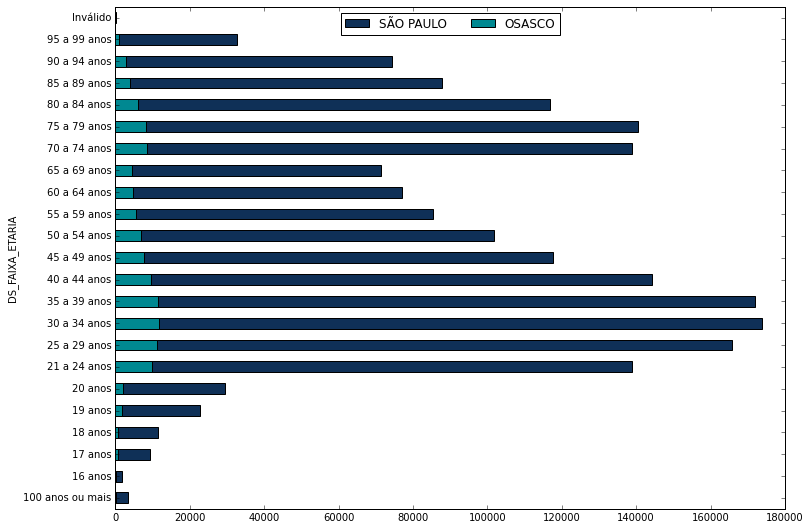

In [11]:
varturno = 1
varmun1 = 'São Paulo'.upper()
varmun2 = 'OsaScO'.upper()
varanalise = 'QT_ABSTENCAO'

turno = dadosTurno.query("NR_TURNO == @varturno")#
turnoCidade = turno.query("NM_MUNICIPIO == @varmun1")#
turnoCidade.groupby('DS_FAIXA_ETARIA')[varanalise].sum().sort_index().plot(kind='barh', figsize=(12,9),color = '#0f3057')#

turno = dadosTurno.query("NR_TURNO == @varturno")
turnoCidade = turno.query("NM_MUNICIPIO == @varmun2")#
turnoCidade.groupby('DS_FAIXA_ETARIA')[varanalise].sum().sort_index().plot(kind='barh', figsize=(12,9),color = '#008891')#
mtpy.legend([varmun1, varmun2], loc='upper center', ncol = 4)

## Maiores abstenções e comparecimentos do estado
Alterações possíveis:
- Turno: varturno = 1 ou varturno = 2
- Comparecimento: varanalise = 'QT_COMPARECIMENTO'
- Abstenção: varanalise = 'QT_ABSTENCAO'

In [12]:
varturno = 1
varanalise = 'QT_ABSTENCAO'

y = dadosTurno.query("NR_TURNO == @varturno")
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')[varanalise].sum().sort_values().nlargest(5)#

NM_MUNICIPIO
SÃO PAULO                1917612
CAMPINAS                  188521
SÃO BERNARDO DO CAMPO     123281
SANTO ANDRÉ               121799
OSASCO                    119113
Name: QT_ABSTENCAO, dtype: int64

<AxesSubplot:ylabel='NM_MUNICIPIO'>

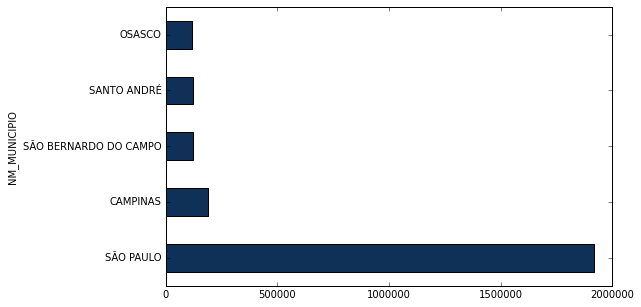

In [13]:
varturno = 1
varanalise = 'QT_ABSTENCAO'

y = dadosTurno.query("NR_TURNO ==@varturno")
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')[varanalise].sum().sort_values().nlargest(5).plot(kind='barh', figsize=(8,5),color = '#0f3057')#

## Menores abstenções e comparecimentos do estado
Alterações possíveis:

- Turno: varturno = 1 ou varturno = 2
- Comparecimento: varanalise = 'QT_COMPARECIMENTO'
- Abstenção: varanalise = 'QT_ABSTENCAO'

In [14]:
varturno = 1
varanalise = 'QT_ABSTENCAO'


y = dadosTurno.query("NR_TURNO == @varturno")#
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')[varanalise].sum().sort_values().nsmallest(5)#

NM_MUNICIPIO
PRACINHA               202
NOVA CASTILHO          206
GUARANI D'OESTE        214
PEDRANÓPOLIS           251
SÃO JOÃO DE IRACEMA    263
Name: QT_ABSTENCAO, dtype: int64

<AxesSubplot:ylabel='NM_MUNICIPIO'>

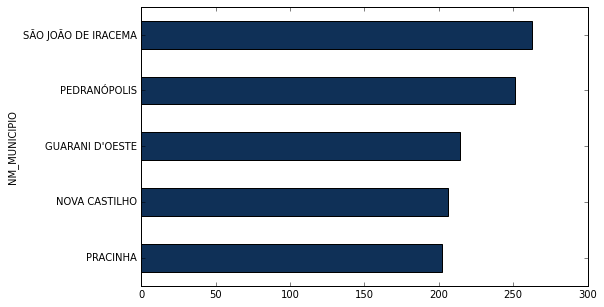

In [15]:
varturno = 1
varanalise = 'QT_ABSTENCAO'



y = dadosTurno.query("NR_TURNO ==@varturno")#
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')[varanalise].sum().sort_values().nsmallest(5).plot(kind='barh', figsize=(8,5),color = '#0f3057')#